In [4]:
import numpy as np
import pandas as pd


In [5]:
calendar = pd.read_csv("../data/calendar.csv")
sales = pd.read_csv("../data/sales_train_validation.csv")
sample_submission = pd.read_csv("../data/sample_submission.csv")
sell_prices = pd.read_csv("../data/sell_prices.csv")

## Calendar

In [6]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [7]:
len(calendar)

1969

In [8]:
calendar["event_name_1"].unique(), calendar["event_name_2"].unique()

(array([nan, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
        'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
        'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
        'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
        'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
        'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
        'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
        'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'], dtype=object),
 array([nan, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
       dtype=object))

# Sales

In [9]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


## Sell prices

If not available, this means that the product was not sold during the examined week

In [10]:
sell_prices.head()


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


## Submission 

* `validation` rows, this corresponds to d_1914 - d_1941
* `evaluation` rows, this corresponds to d_1942 - d_1969

In [11]:
len(sample_submission)

60980

In [12]:
sample_submission.tail()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60979,FOODS_3_827_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plots

In [13]:
def get_event_intevals():
    intevals = calendar[pd.notna(calendar["event_name_1"])]["d"]
    int_intevals = [(int(i[2:])-1, int(i[2:])+1) for i in intevals]
    return int_intevals

In [14]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

def plot(int_intevals, xlim=None):
    
    nrow = len(sales)

    row = sales.loc[random.randint(0, nrow)]
    val = []
    for i in range(1913):
        val.append(row["d_"+str(i+1)])
        
    plt.figure(figsize=(20,8))
    for i in int_intevals:
        if xlim is not None:
            if i[0] > xlim[1]:
                continue
        plt.axvspan(i[0], i[1], color='red', alpha=0.1)
    
    if xlim is None:
        plt.plot(range(len(val)), val)
    else:
        val = val[xlim[0]:xlim[1]]
        plt.plot(range(len(val)), val)
    

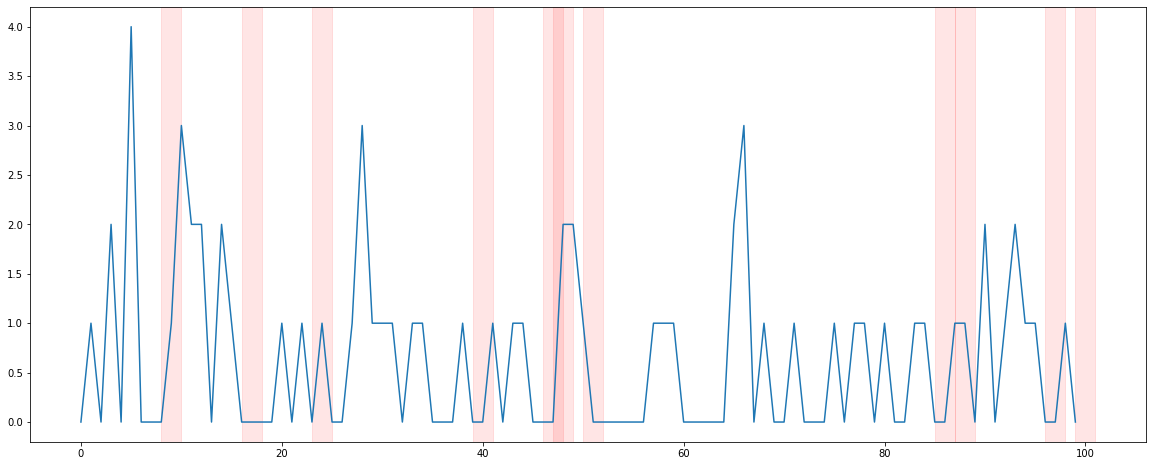

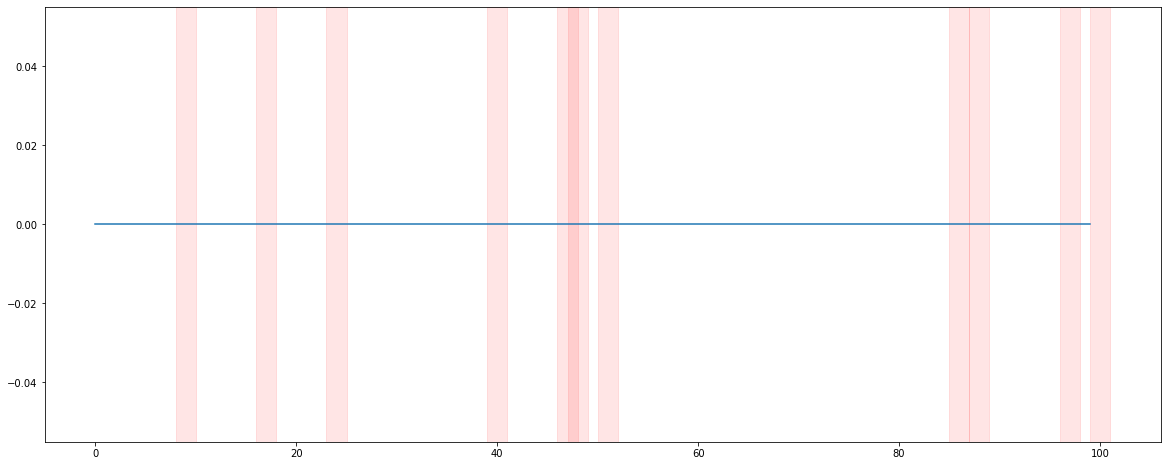

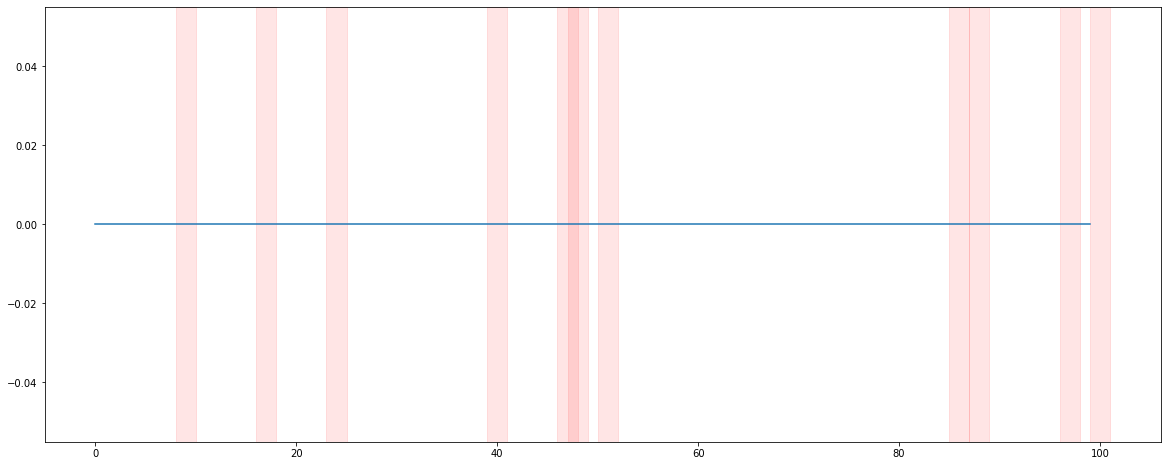

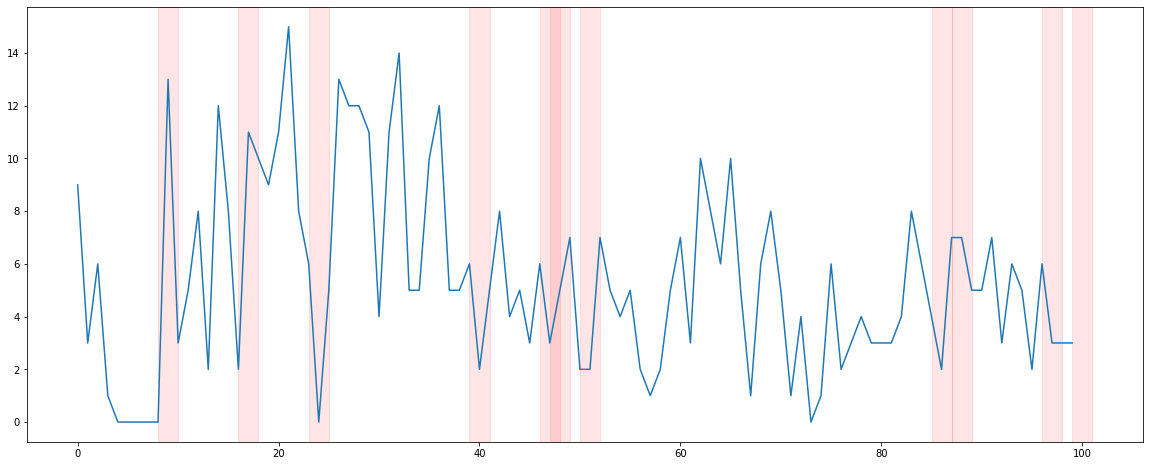

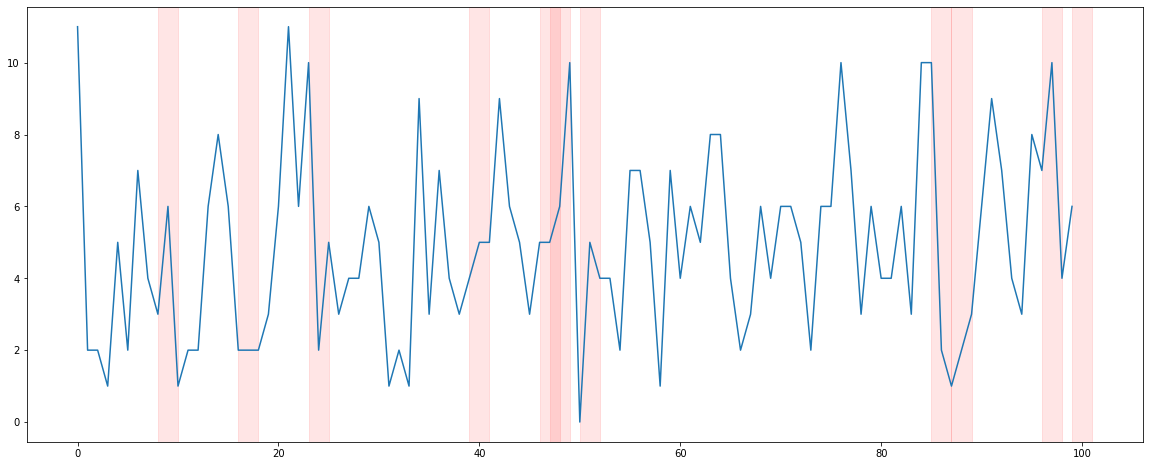

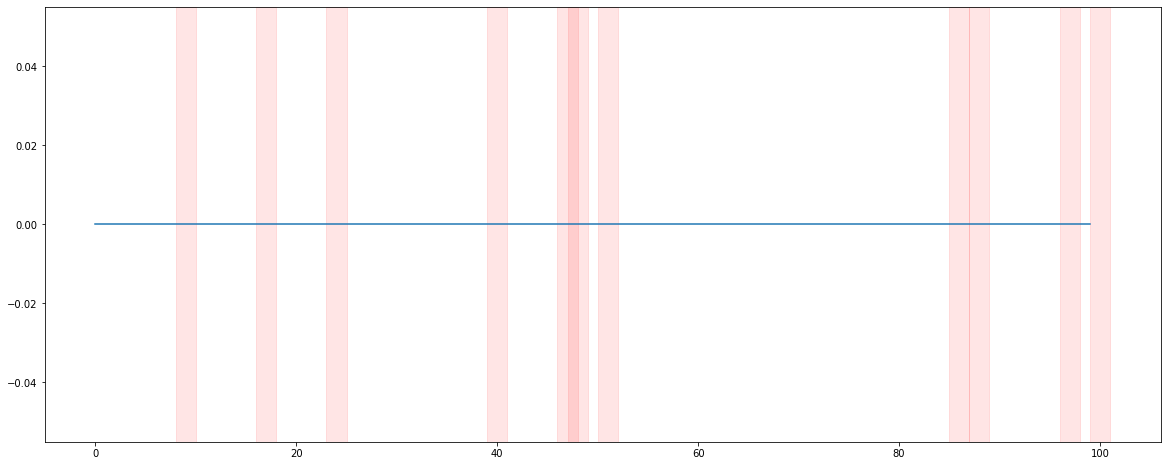

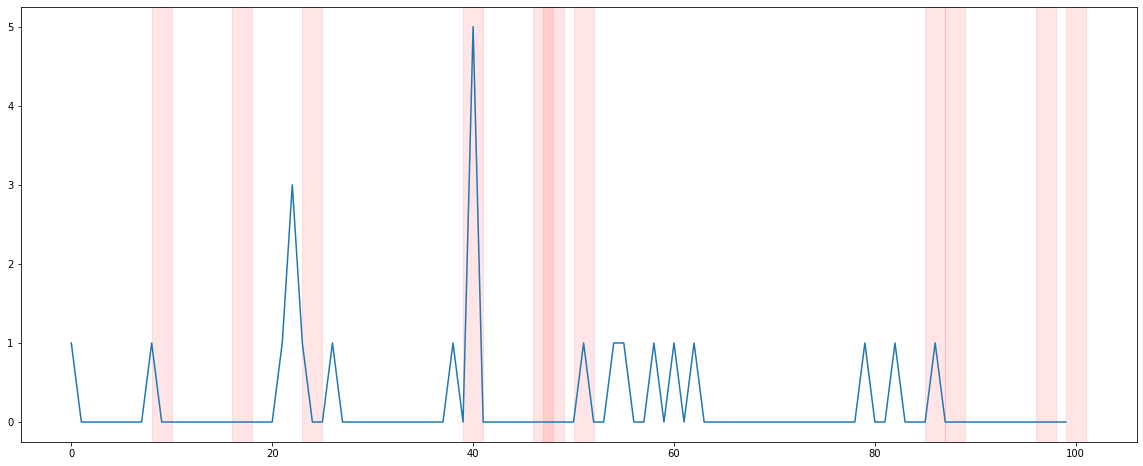

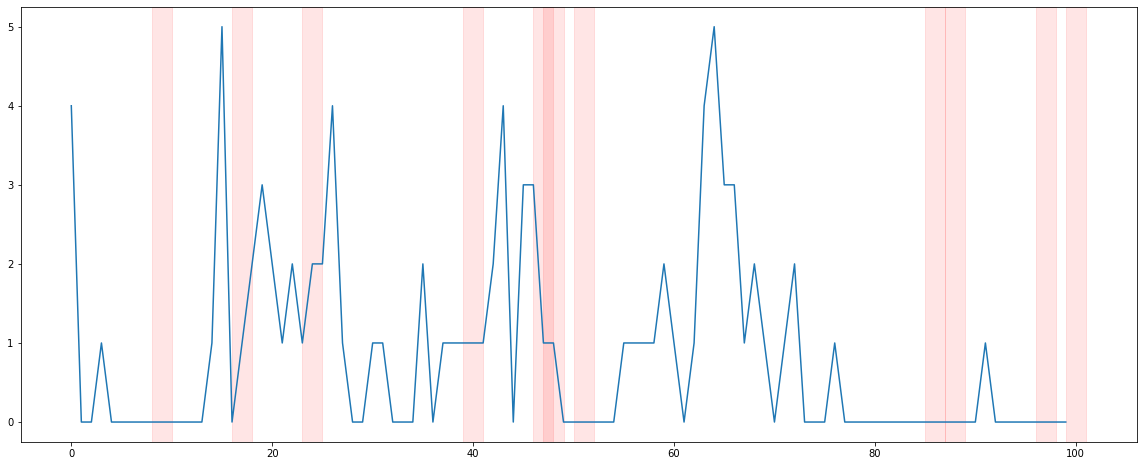

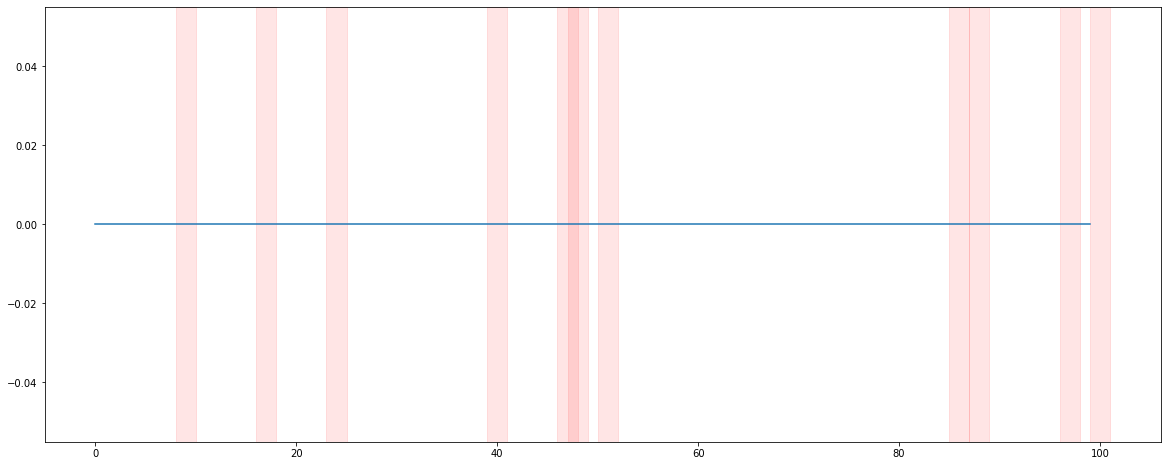

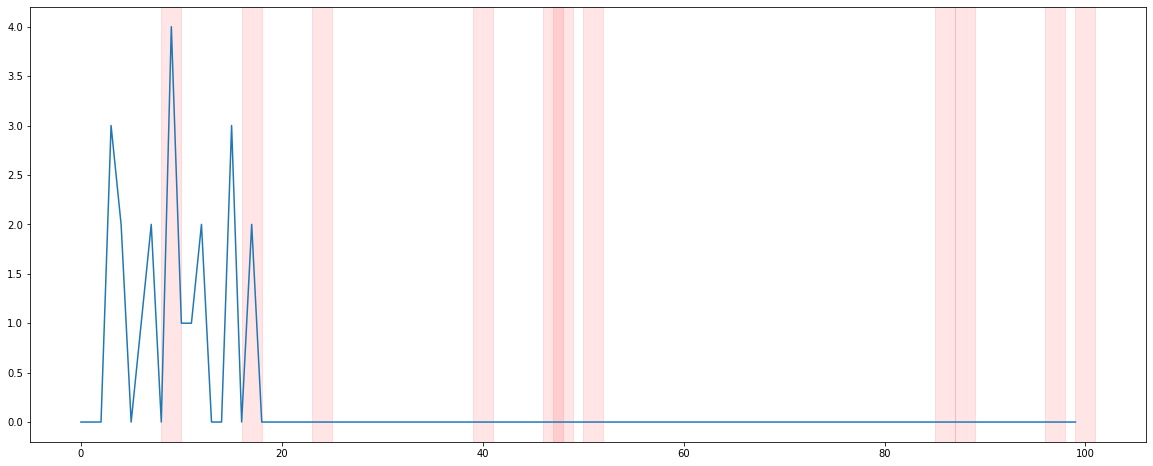

In [12]:
# plt.figure(figsize=(20,8))
for i in range(10):
    plot(get_event_intevals(), (0, 100))

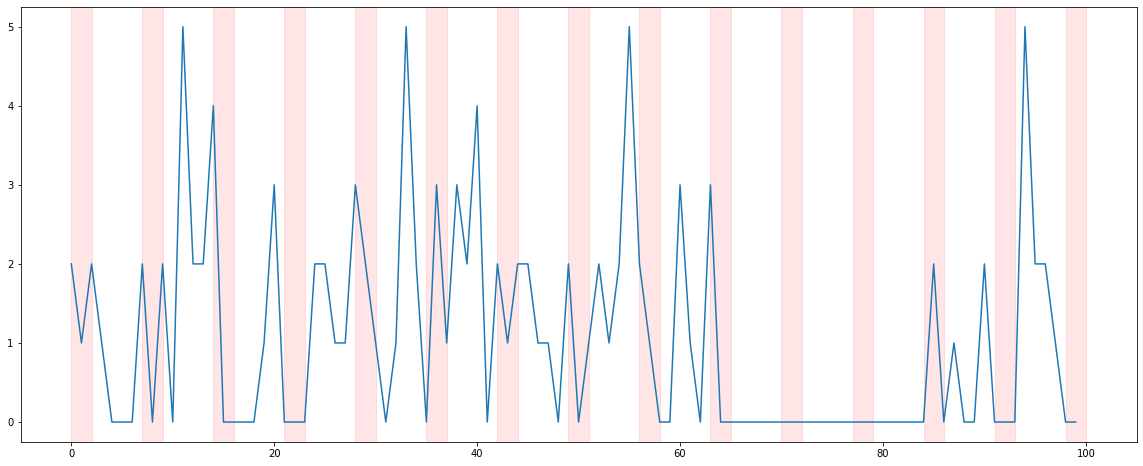

In [14]:
def get_weekend_intevals():
    intevals = calendar[calendar["weekday"]=="Saturday"]["d"]
    int_intevals = [(int(i[2:])-1, int(i[2:])+1) for i in intevals]
#     print(int_intevals)
    return int_intevals

plot(get_weekend_intevals(), (0, 100))